In [1]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Search for best hyperparameters using GridSearchCV and RandomForestRegressor

In [2]:
cars = pd.read_csv("final_cars.csv")

In [3]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [4]:
X = pd.get_dummies(X)

In [5]:
X.shape

(201, 38)

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#### Set aside some data for testing

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [8]:
model = RandomForestRegressor()
params_grid  = [{'n_estimators' : [10, 20, 30, 50] , 'max_depth' :[2, 3, 4, 8, 10]}]

In [9]:
grid_search = GridSearchCV(model, params_grid, cv = 5)
grid_search.fit(X_train,y_train)

,estimator,RandomForestRegressor()
,param_grid,"[{'max_depth': [2, 3, ...], 'n_estimators': [10, 20, ...]}]"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,10


In [10]:
## display scores 
results = grid_search.cv_results_
for score,param in zip(results['mean_test_score'], results['params']):
      print(score,param)

0.822704246450366 {'max_depth': 2, 'n_estimators': 10}
0.836471385329854 {'max_depth': 2, 'n_estimators': 20}
0.8318766457190382 {'max_depth': 2, 'n_estimators': 30}
0.8367226654589874 {'max_depth': 2, 'n_estimators': 50}
0.8311013234595317 {'max_depth': 3, 'n_estimators': 10}
0.8496130364503751 {'max_depth': 3, 'n_estimators': 20}
0.8366653463857547 {'max_depth': 3, 'n_estimators': 30}
0.852842991290726 {'max_depth': 3, 'n_estimators': 50}
0.8014840168357431 {'max_depth': 4, 'n_estimators': 10}
0.8575142370794232 {'max_depth': 4, 'n_estimators': 20}
0.8570484563281257 {'max_depth': 4, 'n_estimators': 30}
0.8510146181509267 {'max_depth': 4, 'n_estimators': 50}
0.871215886074378 {'max_depth': 8, 'n_estimators': 10}
0.8466419423488147 {'max_depth': 8, 'n_estimators': 20}
0.8549872552443036 {'max_depth': 8, 'n_estimators': 30}
0.8665998247725026 {'max_depth': 8, 'n_estimators': 50}
0.8409436159073712 {'max_depth': 10, 'n_estimators': 10}
0.853283675152559 {'max_depth': 10, 'n_estimators':

In [11]:
grid_search.best_params_

{'max_depth': 8, 'n_estimators': 10}

In [12]:
grid_search.best_score_

np.float64(0.871215886074378)

In [13]:
grid_search.best_estimator_

,n_estimators,10
,criterion,'squared_error'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Build model with best estimator

In [14]:
model = grid_search.best_estimator_

In [15]:
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)

In [17]:
r2_score(y_test,y_pred)

0.9255440469611551

In [18]:
np.sqrt(mse)

np.float64(2562.2391835695203)

<Axes: xlabel='None', ylabel='price'>

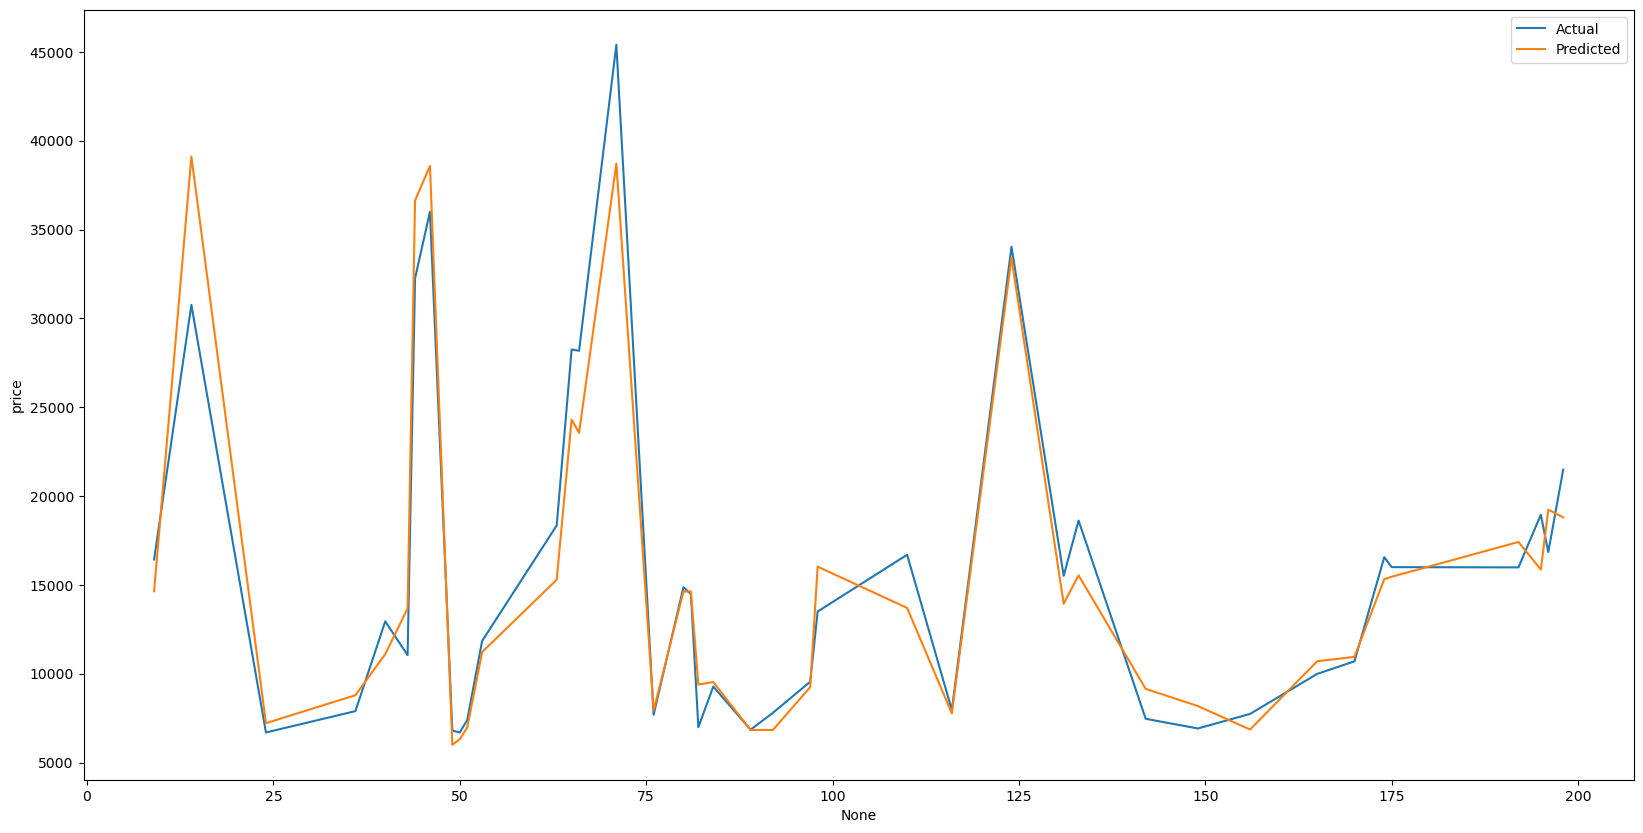

In [19]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")